In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [15]:
df = pd.read_csv("/content/Ice Cream.csv")
df.head()


,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [16]:
missing = df.isnull().sum()
print("Missing values in each column:\n", missing)
df.fillna(df.mean(), inplace=True)


Missing values in each column:
 Temperature    0
Revenue        0
dtype: int64


In [17]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000
Temperature    0
Revenue        0
dtype: int64


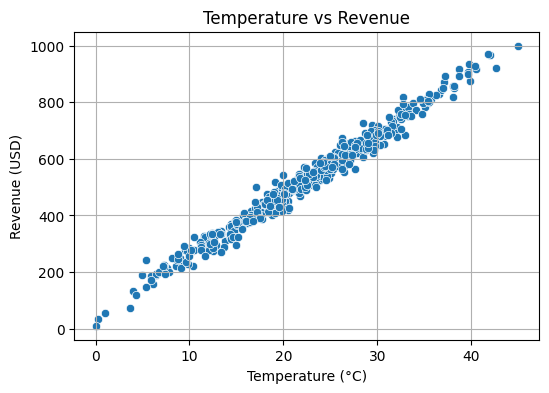

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature', y='Revenue', data=df)
plt.title('Temperature vs Revenue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue (USD)')
plt.grid(True)
plt.show()

In [19]:
correlation = df.corr()
print(correlation)


             Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


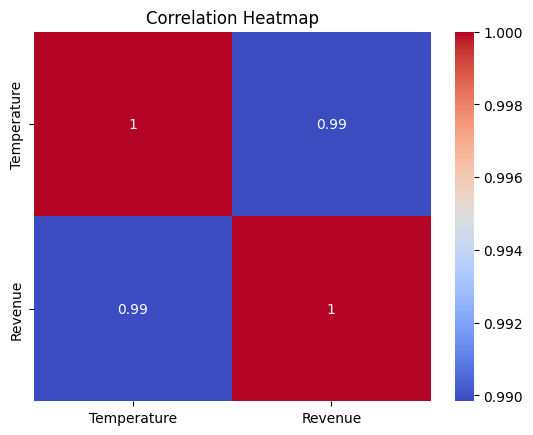

In [20]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
X = df[['Temperature']]
y = df['Revenue']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [32]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluating {model_name}:")
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

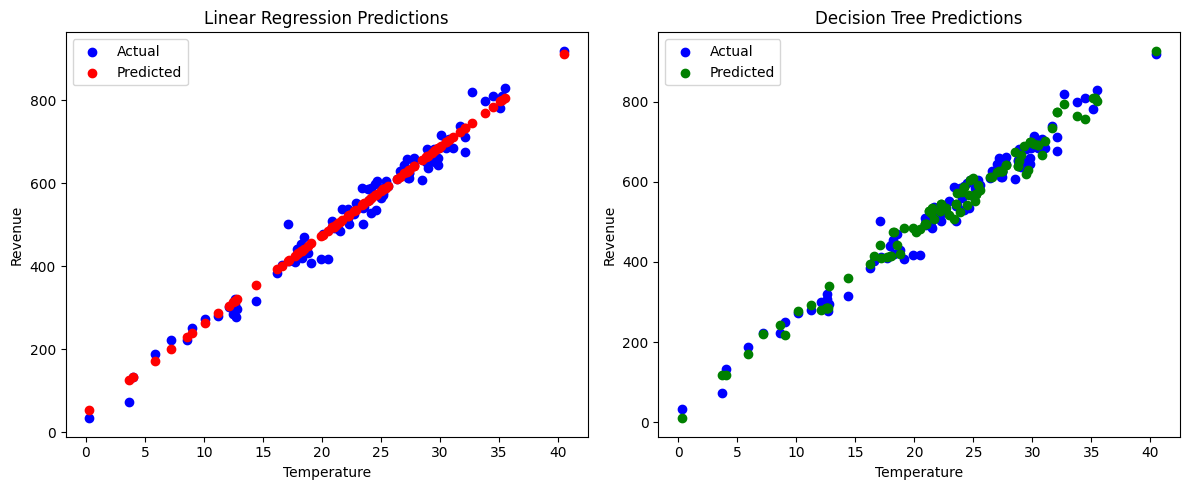

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_lr, color='red', label='Predicted')
plt.title("Linear Regression Predictions")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_dt, color='green', label='Predicted')
plt.title("Decision Tree Predictions")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend()

plt.tight_layout()
plt.show()
